GRATSCALE

In [10]:
import os
import cv2
import cv2, glob, numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image


In [9]:
pip install tqdm

     -------------------------------------- 78.4/78.4 KB 155.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [100]:
def normalize(path):
    for filename in glob.glob(path):
    #for filename in glob(path):
        image = cv2.imread(filename, cv2.IMREAD_COLOR)  # uint8 image
        gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        a = np.asarray(gray_image)

        dst = np.zeros(shape=(5,2))

        b=cv2.normalize(a,dst,0,255,cv2.NORM_MINMAX)


        im = Image.fromarray(b)

        
        im.save(filename)
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)


"\nfrom glob import glob\nimg_mask = 'C:/Users/ROG/Downloads/pre-img/detect/disgust_MMA/*'\nimg_names = glob(img_mask)\nfor fn in img_names:\n    #print(fn)\n    normalize(fn)\n"

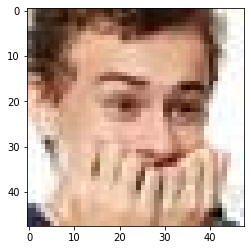

In [57]:
normalize("C:/Users/ROG/Downloads/pre-img/detect/disgust_MMA/20604Exp1angry_student_289.jpg")
'''
from glob import glob
img_mask = 'C:/Users/ROG/Downloads/pre-img/detect/disgust_MMA/*'
img_names = glob(img_mask)
for fn in img_names:
    #print(fn)
    normalize(fn)
'''

RESIZE IMAGE

In [11]:
def resize(path):
    #for filename in glob.glob(path):
    for filename in glob(path):
        img = cv2.imread(filename)
        newimg = cv2.resize(img, (128,128))
        cv2.imwrite(filename, newimg)
        #im = Image.fromarray(newimg)
        #im.save(filename+'.jpeg')
        plt.imshow(newimg)

C:/Users/ROG/Downloads/testimg/40.jpg


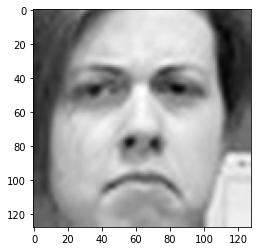

In [13]:
#resize("C:/Users/ROG/Downloads/Martin_Boryczewski_0001.jpg")
from glob import glob
img_mask = 'C:/Users/ROG/Downloads/testimg/40.jpg'
img_names = glob(img_mask)
for fn in img_names:
    print(fn)
    resize(fn)

DETECT BLUR(FFT)

In [3]:
import os
import cv2
import numpy as np
import imutils
import csv

def detect_blur_fft(image, size=60):
    # grab the dimensions of the image and use the dimensions to
    # derive the center (x, y)-coordinates
    (h, w) = image.shape
    (cX, cY) = (int(w / 2.0), int(h / 2.0))
    # compute the FFT to find the frequency transform, then shift
    # the zero frequency component (i.e., DC component located at
    # the top-left corner) to the center where it will be more
    # easy to analyze
    fft = np.fft.fft2(image)
    fftShift = np.fft.fftshift(fft)
    fftShift[cY - size:cY + size, cX - size:cX + size] = 0
    fftShift = np.fft.ifftshift(fftShift)
    recon = np.fft.ifft2(fftShift)
    magnitude = 20 * np.log(np.abs(recon))
    mean = np.mean(magnitude)
    # the image will be considered "blurry" if the mean value of the
    # magnitudes is less than the threshold value
    return mean


from glob import glob

img_mask = 'C:/Users/ROG/Downloads/data clean-20220204T150739Z-001/angry/*.jpg'
img_names = glob(img_mask)

header = ['image','mean']
data = []

for fn in img_names:
    d = []
    orig = cv2.imread(fn)
    orig = imutils.resize(orig, width=300)
    gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
    # apply our blur detector using the FFT
    mean = detect_blur_fft(gray, size=60)
    #print(mean)
    
    head, tail = os.path.split(fn)
    #print(tail)
    #print(head)
 
    d.append(tail)
    d.append(mean)
    
    data.append(d)


with open('notblur_angry.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

    
    


FACE DETECTION

In [6]:
# Import the necessary libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#  Loading the image to be tested
test_image = cv2.imread('C:/Users/ROG/Downloads/Emily_Mortimer_0001.jpg')

# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [58]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [59]:
haar_cascade_face = cv2.CascadeClassifier('C:/Users/ROG/Downloads/haarcascade_frontalface_alt2.xml')

In [60]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


In [61]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

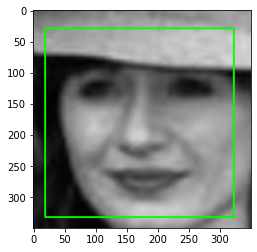

In [62]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))

In [21]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install dlib

  Using cached dlib-19.23.0.tar.gz (3.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for dlib, since package 'wheel' is not installed.
  Running setup.py install for dlib: started
  Running setup.py install for dlib: finished with status 'error'


  error: subprocess-exited-with-error
  
  Running setup.py install for dlib did not run successfully.
  exit code: 1
  
  [65 lines of output]
  running install
  running build
  running build_py
  package init file 'tools\python\dlib\__init__.py' not found (or not a regular file)
  running build_ext
  Building extension for Python 3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:43:08) [MSC v.1926 32 bit (Intel)]
  Invoking CMake setup: 'cmake C:\Users\ROG\AppData\Local\Temp\pip-install-cdaa81sp\dlib_0c8ce1fed5624600b34593c9f9e6e564\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\ROG\AppData\Local\Temp\pip-install-cdaa81sp\dlib_0c8ce1fed5624600b34593c9f9e6e564\build\lib.win32-3.8 -DPYTHON_EXECUTABLE=c:\python38\python.exe -DCMAKE_LIBRARY_OUTPUT_DIRECTORY_RELEASE=C:\Users\ROG\AppData\Local\Temp\pip-install-cdaa81sp\dlib_0c8ce1fed5624600b34593c9f9e6e564\build\lib.win32-3.8'
  -- Building for: Visual Studio 16 2019
  -- Selecting Windows SDK version 10.0.19041.0 to target Windows 10.0

In [2]:
# import the necessary packages
from collections import OrderedDict
import numpy as np
import cv2
import argparse
import dlib
import imutils

ModuleNotFoundError: No module named 'dlib'

In [22]:
facial_features_cordinates = {}

# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_INDEXES = OrderedDict([
    ("Mouth", (48, 68)),
    ("Right_Eyebrow", (17, 22)),
    ("Left_Eyebrow", (22, 27)),
    ("Right_Eye", (36, 42)),
    ("Left_Eye", (42, 48)),
    ("Nose", (27, 35)),
    ("Jaw", (0, 17))
])


def shape_to_numpy_array(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coordinates = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coordinates[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coordinates


def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
    # create two copies of the input image -- one for the
    # overlay and one for the final output image
    overlay = image.copy()
    output = image.copy()

    # if the colors list is None, initialize it with a unique
    # color for each facial landmark region
    if colors is None:
        colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
                  (168, 100, 168), (158, 163, 32),
                  (163, 38, 32), (180, 42, 220)]

    # loop over the facial landmark regions individually
    for (i, name) in enumerate(FACIAL_LANDMARKS_INDEXES.keys()):
        # grab the (x, y)-coordinates associated with the
        # face landmark
        (j, k) = FACIAL_LANDMARKS_INDEXES[name]
        pts = shape[j:k]
        facial_features_cordinates[name] = pts

        # check if are supposed to draw the jawline
        if name == "Jaw":
            # since the jawline is a non-enclosed facial region,
            # just draw lines between the (x, y)-coordinates
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)

        # otherwise, compute the convex hull of the facial
        # landmark coordinates points and display it
        else:
            hull = cv2.convexHull(pts)
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)

    # apply the transparent overlay
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    # return the output image
    print(facial_features_cordinates)
    return output

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("C:/Users/IreneSky/Desktop/AI/Detect-Facial-Features-master/shape_predictor_68_face_landmarks.dat")

# load the input image, resize it, and convert it to grayscale
image = cv2.imread("D:/emotion/testGrayScal/Frank_Bell_0001.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)
    shape = shape_to_numpy_array(shape)

    output = visualize_facial_landmarks(image, shape)
    cv2.imshow("Image", output)
    cv2.waitKey(0)